This notebook has some code used to generate datasets

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
cricket_data = pd.read_csv(r"D:\Documents\Study\Coderush\Projects\Challenges\Challenge_2\notebooks\ICC Test Batting Figures.csv",encoding='ISO-8859-1')
print(cricket_data.shape)
cricket_data.head()

(3001, 12)


,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [7]:
matches = cricket_data.Mat
innings = cricket_data.Inn 
runs = cricket_data.Runs 
high_score = cricket_data['HS']
average_score = cricket_data.Avg 
centuries = cricket_data['100']
half_centuries = cricket_data['50']
ducks = cricket_data['0']

In [9]:
matches.to_csv("matches.csv",index=False)
innings.to_csv("innings.csv",index=False)
runs.to_csv("runs.csv",index=False)
high_score.to_csv("high_score.csv",index=False)
average_score.to_csv("average_score.csv",index=False)
centuries.to_csv("centuries.csv",index=False)
half_centuries.to_csv("half_centuries.csv",index=False)
ducks.to_csv("ducks.csv",index=False)

In [16]:
# random data 
data = {
    "Numbers":np.random.randint(1,1000,15000)
}
df = pd.DataFrame(data)

print(df.head())

   Numbers
0      572
1      879
2      529
3      588
4      184


In [17]:
df.to_csv("random.csv",index=False)

In [5]:
#generate fibonacci series with 10000 terms
fib = [0, 1]
for i in range(2, 20000):
    fib.append(fib[i-1] + fib[i-2])

df = pd.DataFrame({'Fibonacci': fib})
print(df.shape)
df.head(10)
df.to_csv("fibonacci.csv",index=False)

(20000, 1)


In [10]:
# random data 
data = {
    "Square_Roots": [np.sqrt(i) for i in range(1,10001)]
}
df = pd.DataFrame(data)

print(df.shape)
# df.head()
df.to_csv("square_roots.csv",index=False)

(10000, 1)


Now checking for Benford's law

In [5]:
def isnumeric(x):
    try:
        x = int(x)
        return True 
    except:
        return False 

In [8]:
def sort_dictionary_by_key(input_dict):
    return {k: input_dict[k] for k in sorted(input_dict.keys())}

In [9]:
def get_data_distribution(filepath):
    df = pd.read_csv(filepath)
    df['leading_digit'] = df.iloc[:,0].apply(lambda x:str(x)[0])
    leading_digits_count = df['leading_digit'].value_counts()
    leading_digits_dict = leading_digits_count.to_dict()
    filtered_dict = {}
    for k in leading_digits_dict:
        if isnumeric(k):
            if int(k) > 0:
                filtered_dict[k] = leading_digits_dict[k]
    probability_dict = {k: filtered_dict[k]/sum(filtered_dict.values()) for k in filtered_dict.keys()}
    sorted_dict = sort_dictionary_by_key(probability_dict)
    fig = plt.figure(figsize=(10,5))
    plt.bar(sorted_dict.keys(),sorted_dict.values())
    plt.xlabel("Leading Digits")
    plt.ylabel("Probability")
    plt.title("Probability distribution of first significant digit")
    plt.savefig("data_distribution.png")
    plt.show()
    return probability_dict

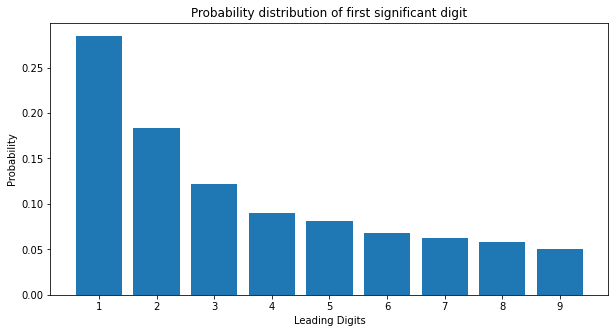

{'1': 0.28473881870945716,
 '2': 0.18333902355752818,
 '3': 0.12154318880163878,
 '4': 0.09047456469784909,
 '5': 0.08091498805052919,
 '6': 0.06794127688630933,
 '7': 0.06247866165926937,
 '8': 0.05804028678729942,
 '9': 0.0505291908501195}

In [72]:
get_data_distribution(r"D:\Documents\Study\Coderush\Projects\Challenges\Challenge_2\notebooks\runs.csv")

In [13]:
def check_benford_law(filepath):
    benford_distribution = {str(k): np.log10(1+(1/k)) for k in range(1,10)}
    observed_distribution = get_data_distribution(filepath)
    # checking if the highest value is of 1 or not
    # observed_max_key = max(observed_distribution,key=observed_distribution.get)
    # benford_max_key = max(benford_distribution,key=benford_distribution.get)
    # return True if observed_max_key == benford_max_key else False
    
    # checking if the absolute deviation between numbers is within limit
    # limit = 0.02 
    # ans = True
    # differences = {}
    # for k in benford_distribution.keys():
    #     differences[k] = abs(benford_distribution[k] - observed_distribution[k])
    #     if differences[k] > limit:
    #         ans = False 
    # print(differences)
    # return ans
    
    # checking key order
    # benford_key_order = list(benford_distribution.keys()) 
    # observed_key_order = list(observed_distribution.keys())
    # if benford_key_order == observed_key_order:
    #     return True 
    # else:
    #     return False 
    
    # checking based on chi square test 
    print(benford_distribution)
    print(observed_distribution)
    for k,v in benford_distribution.items():
        chi_square = sum([(observed_distribution[k] - benford_distribution[k])**2 / benford_distribution[k]])
    print(chi_square)
    

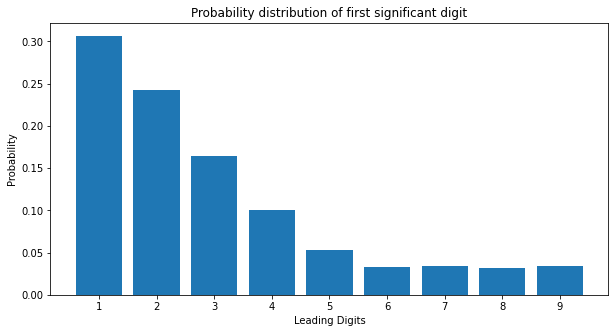

{'1': 0.3010299956639812, '2': 0.17609125905568124, '3': 0.12493873660829993, '4': 0.09691001300805642, '5': 0.07918124604762482, '6': 0.06694678963061322, '7': 0.05799194697768673, '8': 0.05115252244738129, '9': 0.04575749056067514}
{'1': 0.30640083945435465, '2': 0.24204267226302903, '3': 0.16474291710388247, '4': 0.10073452256033578, '5': 0.0528156698146205, '9': 0.033927946834557535, '7': 0.033927946834557535, '6': 0.03322840153899965, '8': 0.03217908359566282}
0.0030582556659781933


In [14]:
check_benford_law(r"D:\Documents\Study\Coderush\Projects\Challenges\Challenge_2\notebooks\average_score.csv")

In [38]:
df.iloc[:,0].head()

0    572
1    879
2    529
3    588
4    184
Name: Numbers, dtype: int32

In [18]:
df['leading_digit'] = df['Numbers'].apply(lambda x:str(x)[0])
df.head()

,Numbers,leading_digit
0,572,5
1,879,8
2,529,5
3,588,5
4,184,1


In [52]:
leading_digits_count = df['leading_digit'].value_counts()
leading_digits_dict = leading_digits_count.to_dict()
leading_digits_dict = 

{'9': 1726,
 '3': 1706,
 '6': 1695,
 '2': 1694,
 '5': 1684,
 '7': 1654,
 '1': 1631,
 '8': 1614,
 '4': 1596}

In [55]:
def isnumeric(x):
    try:
        x = int(x)
        return True 
    except:
        return False 

In [68]:
leading_digits_count = df['leading_digit'].value_counts()
leading_digits_dict = leading_digits_count.to_dict()
# sorted_dict = {}
# for k in sorted(leading_digits_dict):
#     if isnumeric(k):
#         if int(k) > 0:
#             sorted_dict[k] = leading_digits_dict[k]
# sorted_dict = {k: leading_digits_dict[k] for k in sorted(leading_digits_dict)}
# sorted_dict
leading_digits_dict

{'9': 1726,
 '3': 1706,
 '6': 1695,
 '2': 1694,
 '5': 1684,
 '7': 1654,
 '1': 1631,
 '8': 1614,
 '4': 1596}

In [27]:
probability_dict = {k: sorted_dict[k]/sum(sorted_dict.values()) for k in sorted_dict.keys()}
probability_dict

{'1': 0.10873333333333333,
 '2': 0.11293333333333333,
 '3': 0.11373333333333334,
 '4': 0.1064,
 '5': 0.11226666666666667,
 '6': 0.113,
 '7': 0.11026666666666667,
 '8': 0.1076,
 '9': 0.11506666666666666}

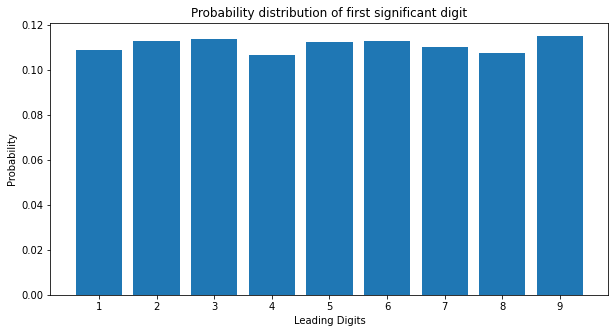

In [34]:
fig = plt.figure(figsize=(10,5))
plt.bar(probability_dict.keys(),probability_dict.values())
plt.xlabel("Leading Digits")
plt.ylabel("Probability")
plt.title("Probability distribution of first significant digit")
plt.savefig("data_distribution.png")
plt.show()

In [33]:
# benford formul
benford_distribution = {k: np.log10(1+(1/k)) for k in range(1,10)}
benford_distribution

{1: 0.3010299956639812,
 2: 0.17609125905568124,
 3: 0.12493873660829993,
 4: 0.09691001300805642,
 5: 0.07918124604762482,
 6: 0.06694678963061322,
 7: 0.05799194697768673,
 8: 0.05115252244738129,
 9: 0.04575749056067514}

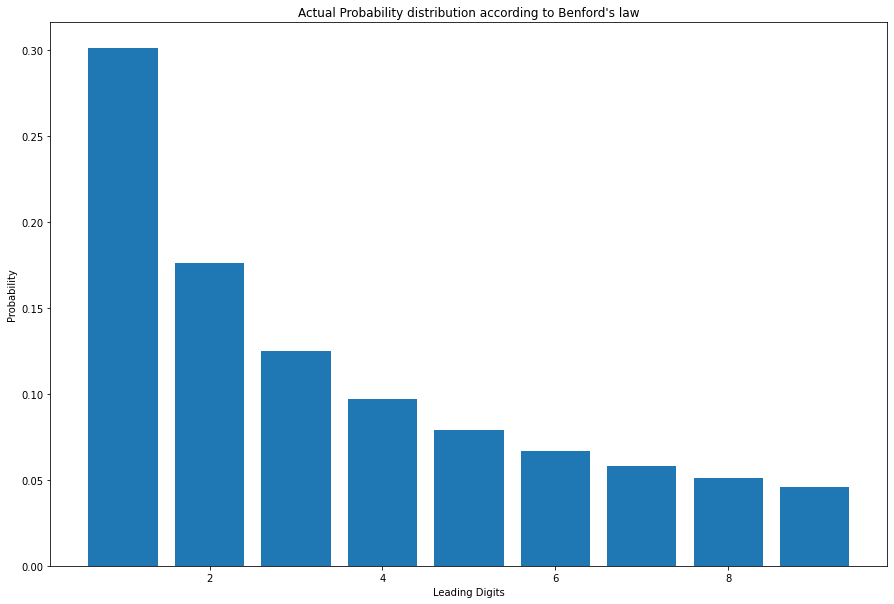

In [90]:
fig = plt.figure(figsize=(15,10))
plt.bar(benford_distribution.keys(),benford_distribution.values())
plt.xlabel("Leading Digits")
plt.ylabel("Probability")
plt.title("Actual Probability distribution according to Benford's law")
plt.savefig("data_distribution.png")
plt.show()

In [ ]:
benford_key_order = benford_distribution.keys()